# Single brain 3D Visualization

This notebook demonstrates how to visualize the cell density of each Region of Interest (ROI) in the mouse brain, utilizing data extracted in the preceding steps of the pipeline.

### Instructions

1. **Set Up Your Environment:**
   To run this notebook, you need to create a virtual environment with the required packages. Follow these steps to set up your environment:

   - **Create a Virtual Environment:**
     Use the following command to create a virtual environment from the provided [brainrender-env.yml](assets/yml/brainrender-env.yml) file:
     ```bash
     conda env create -f brainrender-env.yml
     ```

   - **Activate the Environment:**
     Once created, activate the environment using:
     ```bash
     conda activate brainrender-env
     ```

   - **Select the Kernel:**
     After activating the environment, choose it as the kernel for the notebook. This ensures that all dependencies are correctly resolved when you run the notebook.

In [6]:
import pandas as pd
import numpy as np
import glob
from brainrender import Scene
from brainrender.actors import Points
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from brainglobe_atlasapi import BrainGlobeAtlas
from brainglobe_atlasapi import show_atlases
import brainglobe_heatmap as bgh



# MANDATORY INPUTS
csv_file = "/run/user/1000/gvfs/smb-share:server=upcourtinenas,share=cervical/CERVICAL_ID/connectome_analysis/final_dataset/DR/uninjured/602/_Measurements/whole_brain.csv"
image_dir = "" #folder where to save images
side = "Left" #Rigth
n_roi_displayed = 20 #first most dense roi to display
verbose = True


# Prepare
Choose which region to plot and the relative color.

In [3]:
df = pd.read_csv(csv_file)

# Take the ROI only from one side
df = df[df["Side"] == side]

# Take only first most dense regions
df = df.sort_values(by='Cell Density', ascending=False)
df = df.iloc[:n_roi_displayed, :] #take first elements

# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))
#cell_density_data = {"VISp": 50,"CA1": 30,"M1": 65,"S1": 90,"SCop":100}

# Normalize cell density values to range [0, 1]
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)
min_density = min(cell_density_data.values())
max_density = max(cell_density_data.values())
normalized_densities = {region: normalize(density, min_density, max_density) for region, density in cell_density_data.items()}

# Create a colormap using matplotlib
cmap = plt.get_cmap('Reds')  # You can choose other colormaps like 'plasma', 'inferno', etc.
norm = mcolors.Normalize(vmin=0, vmax=1)

# Map normalized densities to colors
colors = {region: mcolors.to_hex(cmap(norm(density))) for region, density in normalized_densities.items()}

print(colors)

# Colors in rgb triplets
rgb_colors = {region: mcolors.to_rgb(cmap(norm(density))) for region, density in normalized_densities.items()}

print(rgb_colors)


{'LDT': '#67000d', 'DR': '#e43027', 'IF': '#e63328', 'MMd': '#ea362a', 'PN': '#f44f39', 'SG': '#f44f39', 'PCG': '#fa6648', 'VI': '#fb7656', 'IPL': '#fb7c5c', 'AT': '#fc8666', 'IPDL': '#fc9d7f', 'VTN': '#fca183', 'pm': '#fca285', 'IPRL': '#fcaa8d', 'IPA': '#fcbda4', 'RM': '#fee5d9', 'IV': '#fee5d9', 'VTA': '#feeae1', 'PDTg': '#fff3ed', 'IPDM': '#fff5f0'}
{'LDT': (0.403921568627451, 0.0, 0.05098039215686274), 'DR': (0.8946251441753171, 0.18992695117262592, 0.15478662053056516), 'IF': (0.9034832756632064, 0.19853902345251828, 0.15847750865051902), 'MMd': (0.9167704728950405, 0.21145713187235693, 0.16401384083044987), 'PN': (0.9570011534025374, 0.3087120338331411, 0.22191464821222606), 'SG': (0.9570011534025374, 0.3087120338331411, 0.22191464821222606), 'PCG': (0.9806228373702421, 0.40123029603998467, 0.2809688581314879), 'VI': (0.9854825067281815, 0.46243752402921956, 0.3369473279507882), 'IPL': (0.9860976547481738, 0.48704344482891193, 0.3615532487504806), 'AT': (0.9870818915801615, 0.52

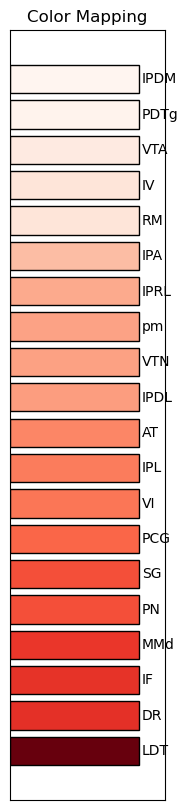

In [4]:
# Plot the colors
fig, ax = plt.subplots(figsize=(2,10))  # Adjust the size as needed

# Create a list of color names and their corresponding colors
regions = list(rgb_colors.keys())
color_values = list(color for color in rgb_colors.values())

# Create a bar plot to show the colors
for i, (region, color) in enumerate(rgb_colors.items()):
    ax.barh(i, 1, color=color, edgecolor='black')
    ax.text(1.02, i, region, va='center', ha='left')

# Remove axes and labels for better visualization
ax.set_xlim(0, 1.2)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('Color Mapping')

plt.show()

### Choose Atlas
Check here atlas available: [link](https://brainglobe.info/documentation/brainglobe-atlasapi/index.html)

In [4]:
# SHow all atlases supported by brainrender
show_atlases()

# Select an atlas
bg_atlas = BrainGlobeAtlas("allen_mouse_50um", check_latest=False)

# Show atlas choosen
print(bg_atlas)

# List all brain regions in the atlas
print(bg_atlas.lookup_df)

╭───────────────────────────────── Brainglobe Atlases ─────────────────────────────────╮
│                                                                           Latest     │
│  Name                              Downloaded  Updated  Local version    version     │
│  allen_mouse_25um                      ✔          ✔          1.2           1.2       │
│  allen_mouse_50um                      ✔          ✔          1.2           1.2       │
│  example_mouse_100um                                                       1.2       │
│  allen_mouse_10um                                                          1.2       │
│  allen_mouse_100um                                                         1.2       │
│  mpin_zfish_1um                                                            1.0       │
│  allen_human_500um                                                         1.0       │
│  kim_mouse_10um                                                            1.1       │
│  kim_mouse_25um                                                            1.1       │
│  kim_mouse_50um                                                            1.1       │
│  kim_mouse_100um                                                           1.1       │
│  osten_mouse_10um                                                          1.1       │
│  osten_mouse_25um                                                          1.1       │
│  osten_mouse_50um                                                          1.1       │
│  osten_mouse_100um                                                         1.1       │
│  allen_cord_20um                                                           1.1       │
│  azba_zfish_4um                                                            1.2       │
│  whs_sd_rat_39um                                                           1.1       │
│  perens_lsfm_mouse_20um                                                    1.2       │
│  admba_3d_e11_5_mouse_16um                                                 1.0       │
│  admba_3d_e13_5_mouse_16um                                                 1.0       │
│  admba_3d_e15_5_mouse_16um                                                 1.0       │
│  admba_3d_e18_5_mouse_16um                                                 1.0       │
│  admba_3d_p4_mouse_16.752um                                                1.0       │
│  admba_3d_p14_mouse_16.752um                                               1.0       │
│  admba_3d_p28_mouse_16.752um                                               1.0       │
│  admba_3d_p56_mouse_25um                                                   1.0       │
│  princeton_mouse_20um                                                      1.1       │
│  kim_dev_mouse_stp_10um                                                    1.2       │
│  kim_dev_mouse_idisco_10um                                                 1.2       │
│  kim_dev_mouse_mri_a0_10um                                                 1.2       │
│  kim_dev_mouse_mri_adc_10um                                                1.2       │
│  kim_dev_mouse_mri_dwi_10um                                                1.2       │
│  kim_dev_mouse_mri_fa_10um                                                 1.2       │
│  kim_dev_mouse_mri_mtr_10um                                                1.2       │
│  kim_dev_mouse_mri_t2_10um                                                 1.2       │
│  sju_cavefish_2um                                                          1.0       │
│  allen_mouse_bluebrain_barrels_1…                                          1.0       │
│  allen_mouse_bluebrain_barrels_2…                                          1.0       │
│  oldenburg_blackcap_25um                                                   0.1       │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────────────────────╮
│                         Allen mouse 50um                         │
│                                                                  │
│         name:  allen_mouse (v1.2)                                │
│      species:  Mus musculus                                      │
│     citation:  Wang et al 2020                                   │
│                https://doi.org/10.1016/j.cell.2020.04.007        │
│         link:  http://www.brain-map.org                          │
│                                                                  │
│  orientation:  asr                                               │
│    symmetric:  True                                              │
│   resolution:  [50.0, 50.0, 50.0]                                │
│        shape:  [264, 160, 228]                                   │
╰──────────────────────────────────────────────────────────────────╯

    acronym   id                 

## Visualize

### With only BrainRender

In [7]:
# Necessary for running in jupyternotebook
import vedo
vedo.settings.default_backend= 'vtk'

# Display the Allen Brain mouse atlas.
scene = Scene(atlas_name="allen_mouse_50um", title="Cells Density in differnt brain regions")

# Add each brain region with the corresponding color
for region, color in colors.items():
    scene.add_brain_region(region, alpha=0.7, color=color)

# Add label to the brain region
#scene.add_label(primary_visual, "Primary visual cortex")

# Display the figure.
scene.render()

### With Napari

In [6]:
from brainrender_napari.napari_atlas_representation import NapariAtlasRepresentation
from brainglobe_atlasapi import BrainGlobeAtlas
import napari


viewer = napari.Viewer()
viewer.dims.ndisplay = 3
# replace "mpin_zfish_1um" with atlas of interest below
napari_atlas = NapariAtlasRepresentation(bg_atlas, viewer)
napari_atlas.add_to_viewer()

# Change who is shown
layer = viewer.layers["allen_mouse_50um_annotation"]
layer.visible = False
layer = viewer.layers["allen_mouse_50um_reference"]
layer.visible = True

# replace "GADb1" with name of additional reference for your atlas (if it has any)
#napari_atlas.add_additional_reference("GADb1")

# replace "root" with acronym of structure of interest below
#napari_atlas.add_structure_to_viewer("CA1")

for region, color in rgb_colors.items(): #Attention: here colors are rgb

    if not (region in bg_atlas.lookup_df["acronym"].to_list()):
        print(f"Region {region} not present in the atlas.")
        continue

    print(f"Renderinf region {region}...")

    # Add region as mesh
    napari_atlas.add_structure_to_viewer(region)

    #Change name mesh just added (it is a layer in napari)
    viewer.layers[-1].name = region

    #Change color mesh
    surface_layer = viewer.layers[-1] # get the vertex layer
    n_vertices = len(surface_layer.vertex_colors) # find number of vertices in the surface layer
    surface_layer.vertex_colors = np.repeat([color], n_vertices, axis=0) # make the surface layer red (1, 0, 0)


napari.run()

/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainrender_napari/napari_atlas_representation.py:24: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.6.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self._tooltip = QLabel(self.viewer.window.qt_viewer.parent())


Renderinf region LDT...
Renderinf region DR...
Renderinf region IF...
Renderinf region MMd...
Renderinf region PN...
Renderinf region SG...
Renderinf region PCG...
Renderinf region VI...
Renderinf region IPL...
Renderinf region AT...
Renderinf region IPDL...
Renderinf region VTN...
Renderinf region pm...
Renderinf region IPRL...
Renderinf region IPA...
Renderinf region RM...
Renderinf region IV...
Renderinf region VTA...
Renderinf region PDTg...
Renderinf region IPDM...


# 2D HeatMap

{'FRP1': 7.985825417491224e-05, 'FRP2/3': 0.0, 'FRP5': 0.0004267863179104, 'FRP6a': 0.0003858362099566, 'FRP6b': 0.0, 'MOp1': 0.0002431361251487, 'MOp2/3': 0.0002878156610567, 'MOp5': 0.0004922444734521, 'MOp6a': 0.000367527354137, 'MOp6b': 0.0002361728969295, 'MOs1': 0.0002422712178926, 'MOs2/3': 0.0002865209904295, 'MOs5': 0.0003708799920207, 'MOs6a': 0.0003854221443097, 'MOs6b': 0.0003450219088912, 'SSp-n1': 0.0002068326978973, 'SSp-n2/3': 0.0001872761770167, 'SSp-n4': 0.000172332783961, 'SSp-n5': 0.0003728015260947, 'SSp-n6a': 0.0001853795862586, 'SSp-n6b': 0.0001319927272007, 'SSp-bfd1': 0.0001565050256442, 'SSp-bfd2/3': 0.0001595094185775, 'SSp-bfd4': 0.0001780587111047, 'SSp-bfd5': 0.0003124492599077, 'SSp-bfd6a': 0.0001884876346171, 'SSp-bfd6b': 0.0001804269913005, 'SSp-ll1': 0.000138319397193, 'SSp-ll2/3': 0.0001304195725511, 'SSp-ll4': 0.0001430533302815, 'SSp-ll5': 0.0003836361538711, 'SSp-ll6a': 0.0002675361671016, 'SSp-ll6b': 0.0002505466472303, 'SSp-m1': 0.00024342497812,

<Figure size 200x200 with 0 Axes>

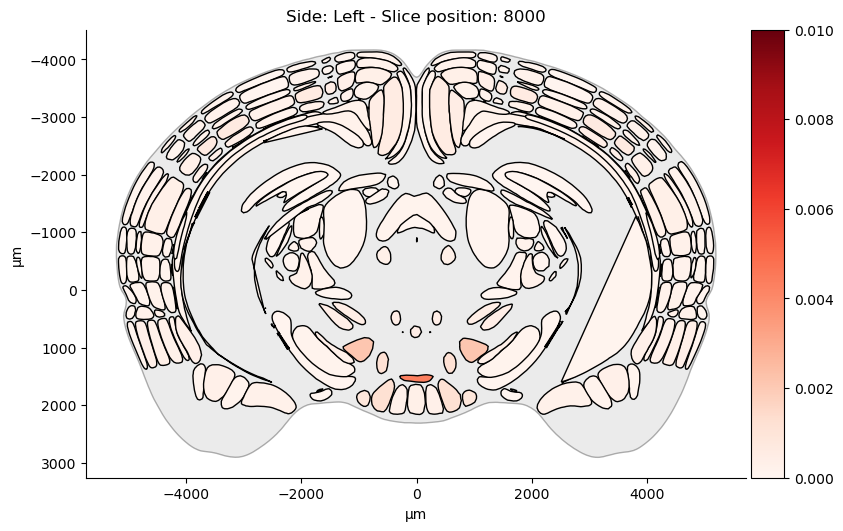

The region RSPd4 is in the onthology but does not have a corresponding volume in the atlas being used: allen_mouse_25um. Skipping


<Figure size 200x200 with 0 Axes>

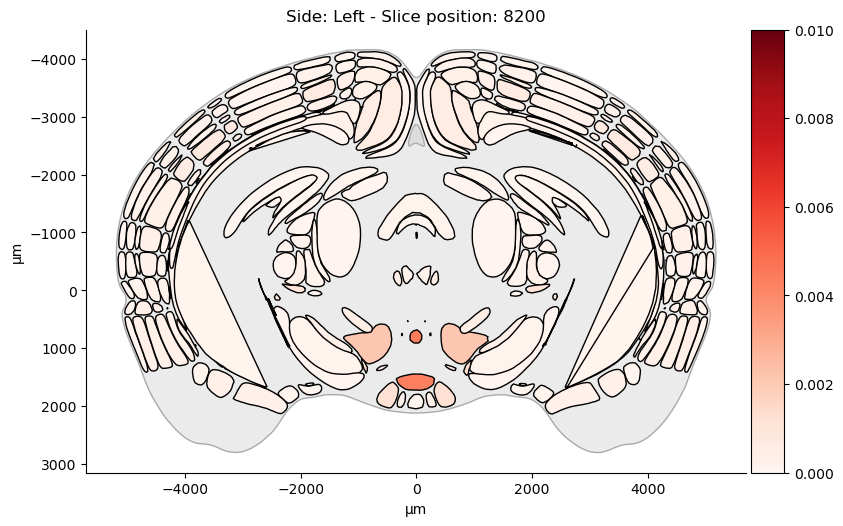

The region RSPd4 is in the onthology but does not have a corresponding volume in the atlas being used: allen_mouse_25um. Skipping


<Figure size 200x200 with 0 Axes>

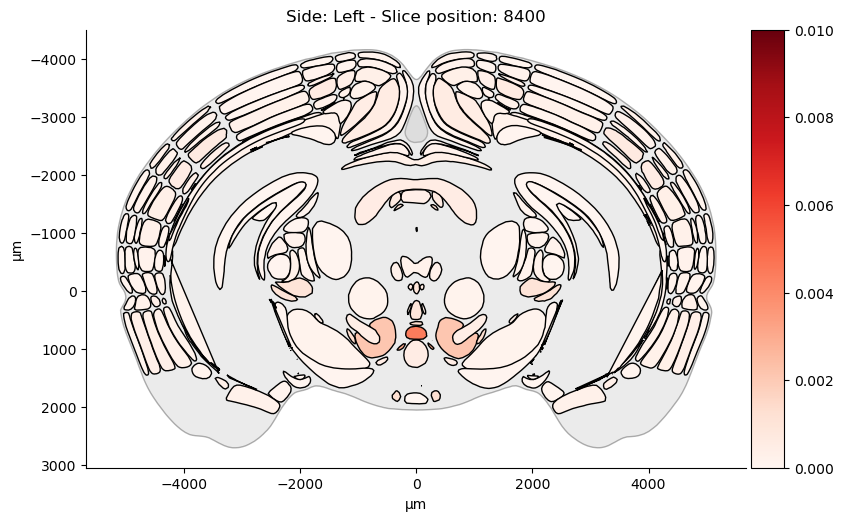

The region RSPd4 is in the onthology but does not have a corresponding volume in the atlas being used: allen_mouse_25um. Skipping


<Figure size 200x200 with 0 Axes>

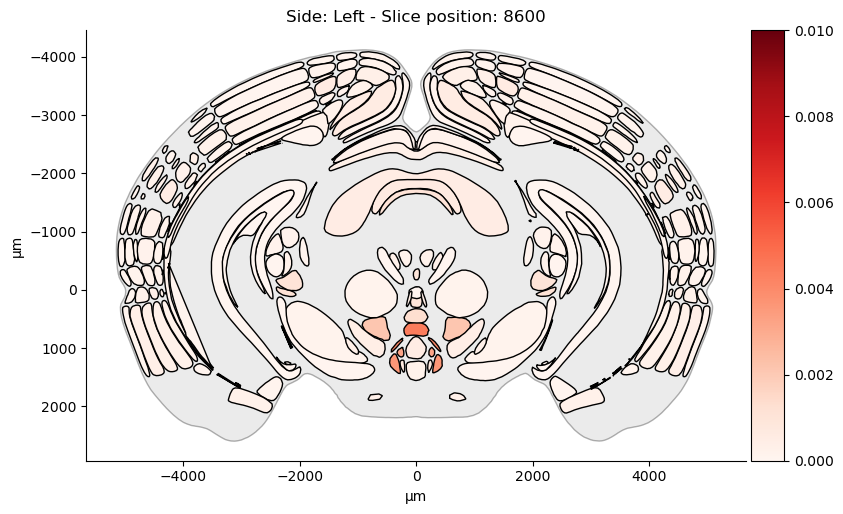

The region RSPd4 is in the onthology but does not have a corresponding volume in the atlas being used: allen_mouse_25um. Skipping


<Figure size 200x200 with 0 Axes>

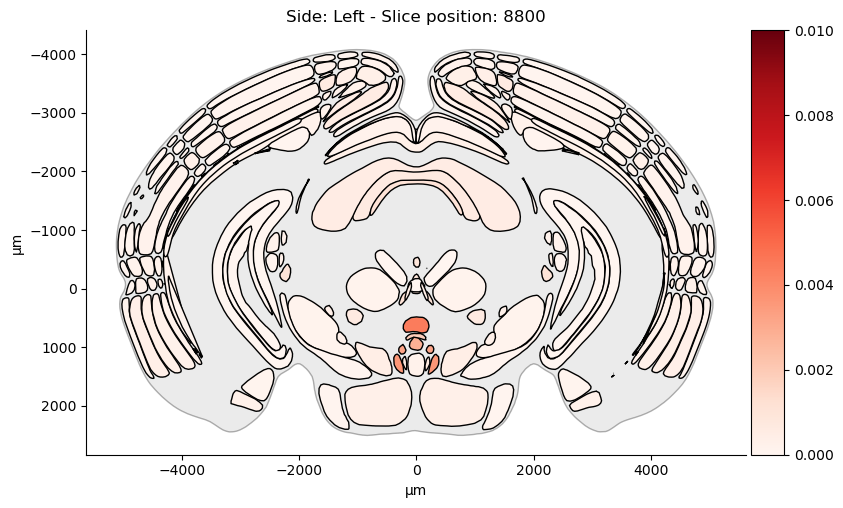

In [5]:
df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == side]

#Attention:Here we want to show all the regions
#BUT we have to use only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas

# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))

print(cell_density_data)
start_cut = 8000 #from olfacotry bulb
end_cut = 9000 #to myelenchephalon
step = 200

# Iterate over cuts range
for cut in range(start_cut, end_cut, step):

    plt.figure(figsize=(2,2))  # Create a new figure each iteration
    
    # Create Heatmap object
    f = bgh.Heatmap(
        cell_density_data,
        position=cut,
        orientation="frontal",  # Adjust orientation as needed
        title=f"Side: {side} - Slice position: {cut}",
        vmin=0,
        vmax=0.01,
        cmap='Reds',
        atlas_name="allen_mouse_25um",
        format='2D'
    )
    
    # Plot the heatmap
    fig = f.plot(show_legend=False, xlabel='µm', ylabel='µm', hide_axes=False)
    
    # Save the figure as PDF
    #fig.savefig(os.path.join(image_dir, f'{side}-{cut}.pdf'), dpi=100)
    



# 3D HeatMap
**ATTENTION**: it cannot handle too mnay regions!!!

In [7]:
# Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == side]
# Take only first most dense regions
df = df.sort_values(by='Cell Density', ascending=False)
df = df.iloc[:n_roi_displayed, :] #take first elements
#Attention:Here we want to show all the regions
#BUT we have to use only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas


# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))

bgh.Heatmap(
    cell_density_data,
    position=(
        5000
    ),
    orientation="sagittal",  # 'frontal' or 'sagittal', or 'horizontal' or a tuple (x,y,z)
    title="horizontal view",
    vmin=0,
    vmax=0.01,
    cmap='Reds',
    format="3D",
).show()

A `brainrender.scene.Scene` with 22 actors.